## Аттестация. Практическое задание в Jupyter

В данном блоке вам предстоит решить задачу, которую автор когда-то решал на одном из своих собеседований.
Вам предоставлена таблица с данными (скачать файл можно на платформе) о ежедневной выработке энергии солнечными батареями. Информация в ней содержится в двух столбцах: 
* date - дата наблюдения
* cum_power - накопленная (кумулятивная) выработка энергии на указанный день

То есть перед вами классический пример временного ряда: числовой показатель, зависящий от времени. Давайте с ним поработаем.


In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png"

In [2]:
df = pd.read_csv('https://github.com/keloin/SF/raw/main/test-1-python/solarpower.zip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       664 non-null    object 
 1   cum_power  664 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.5+ KB


1\. В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями: 
    $$x^*_i  = \frac{x_{i-1} + x_{i+1}}{2}$$ 
    
*Совет: проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power, но вы можете предложить более изящное решение.*

In [3]:
missing_values_slice = df[df['cum_power'] == -1]

print(missing_values_slice.index)

# since we know that it is not the first element, and not the last element, we can execute the following
for i in missing_values_slice.index:
    df.iloc[i,1] = .5 * ( df.iloc[i-1,1] + df.iloc[i+1,1])

Int64Index([45, 647], dtype='int64')


2\. Теперь, когда таблица заполнена, создайте столбец day_power - ежедневный прирост выработки солнечной энергии.

После чего создайте данные о ежемесячной выработке энергии на каждый год. 
    
*Совет: для того, чтобы выделить из даты год и месяц проще всего воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды, в данном случае 'М' - месяц.*

In [4]:
df['day_power'] = df['cum_power'].diff()

In [5]:
df['date'] = pd.to_datetime(df['date'])

monthly_production = df.groupby(df['date'].dt.to_period('m')).sum()
monthly_production.index = monthly_production.index.to_series().astype(str)

3\. Постройте график временного ряда - ежемесячной выработки солнечной энергии. Не забудьте подписать оси и сам график.
Укажите в какие сезоны наблюдается подъем, а в какие спад?

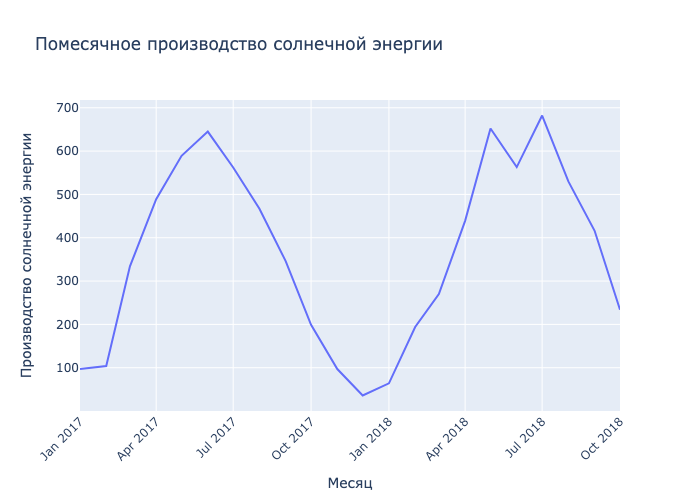

In [6]:
fig = px.line(monthly_production, y='day_power', title='Помесячное производство солнечной энергии')
fig.update_layout(xaxis_title='Месяц', yaxis_title='Производство солнечной энергии')
fig.update_xaxes(tickangle=-45)
fig.show()

Собственно, как и ожидалось, зимой производится сильно меньше солнечной энергии. Больше всего электричества производится летом. Более длинные дни, больше солнечного света попадает на фотоэлементы.

Мы также наблюдаем небольшой спад летом 2018 года. Скорее всего это произошло из-за пожаров и сильного задымления в тот год.